# <span style=color:red><b>Sprint 7. Algoritmes d’aprenentatge supervisat: Classificació</b></span> 

- [X] <span style=color:red><b>__Exercici 1:__</b></span> 
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('wineData.txt', sep=',')
db=df.copy()
db.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
 
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [2]:

db.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
db.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
db['Class'].value_counts()

2    71
1    58
3    48
Name: Class, dtype: int64

Ahora  empezamos con el modelo "Árboles de clasificación"

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [9]:
# Dividimos la variable dependiente de las independientes
feature_cols =['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

X = db[feature_cols] 
y = db.Class 

In [10]:
# Dividivos la bese de datos en los conjuntos Train/Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) # 70% training and 30% test


### __Decision Tree Classifier__

In [11]:
# Creamos el modelo y lo ajustamos a nuestros datos Train
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

# Calculamos la predicción para el dataset Test
y_pred = clf.predict(X_test)

__A continuación evaluamos el modelo__

In [12]:
accuracy_DecisionTree=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_DecisionTree)


Accuracy: 0.9074074074074074


Ahora vamos a visualizar el árbol

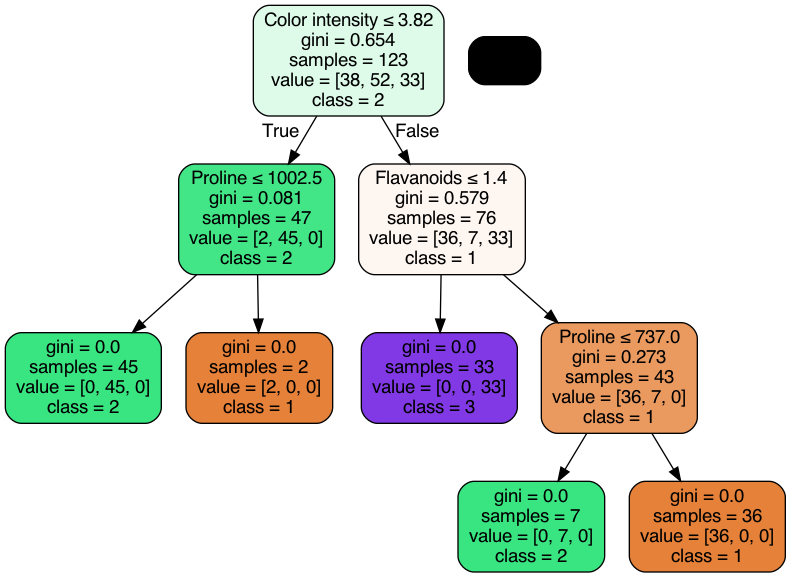

In [13]:
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO  

from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('arbol.png')

Image(graph.create_png())

### __Ahora probamos KNN Clasification__

In [14]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred_KNN = classifier.predict(X_test)

In [16]:
# Aquí evaluamos la clasificación
accuracy_KNN=classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.6851851851851852


- [X] <span style=color:red><b>__Exercici 2:__</b></span>
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.


In [17]:
accuracy=pd.DataFrame(data=[('Decision Tree Classifier', accuracy_DecisionTree), ('KNN Classification',accuracy_KNN)], columns=['Modelo', 'Accuracy'])
accuracy

,Modelo,Accuracy
0,Decision Tree Classifier,0.907407
1,KNN Classification,0.685185


In [18]:
# Cunfusion Matrix Decision Tree Classifier
matrix_DecTree=metrics.confusion_matrix(y_test, y_pred)
matrix_DecTree=pd.DataFrame(matrix_DecTree, index=['Actual: 1','Actual: 2','Actual: 3'], columns=['Predicted: 1','Predicted: 2','Predicted: 3']) 
matrix_DecTree


,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 1,16,4,0
Actual: 2,0,19,0
Actual: 3,0,1,14


In [19]:
# Cunfusion Matrix KNN
matrix_KNN=metrics.confusion_matrix(y_test, y_pred_KNN)
matrix_KNN=pd.DataFrame(matrix_KNN, index=['Actual: 1','Actual: 2','Actual: 3'], columns=['Predicted: 1','Predicted: 2','Predicted: 3']) 
matrix_KNN


,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 1,16,0,4
Actual: 2,1,15,3
Actual: 3,1,8,6


Con esto nuevamente vemos que parece más preciso el modelo del árbol.

- [x] <span style=color:red><b>__Exercici 3:__</b></span>
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.


__Para el modelo del árbol de decisión ahora utilizanmos el criterio de "entropía" en lugar de "gini"__

In [20]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf2 = clf2.fit(X_train,y_train)

y2_pred = clf2.predict(X_test)
accuracy_DecisionTree_Ent=metrics.accuracy_score(y_test, y2_pred)
print("Accuracy:",accuracy_DecisionTree_Ent)


Accuracy: 0.9074074074074074


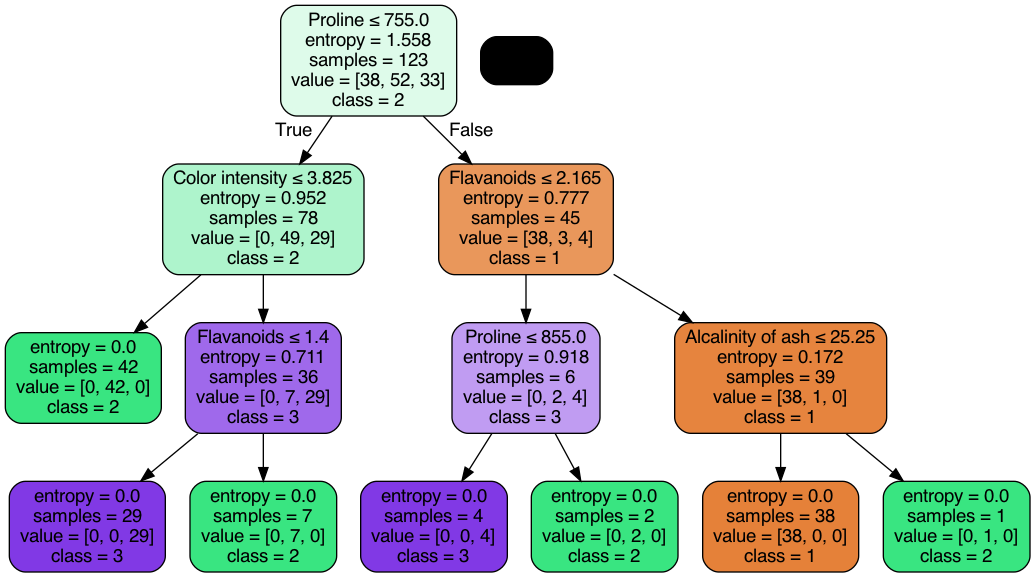

In [21]:
# Visualización del modelo

dot_data2 = StringIO()
export_graphviz(clf2, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,
                class_names=['1','2','3']
               )
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
graph2.write_png('arbol2.png')
Image(graph2.create_png())

__Para el modelo KNN cambiamos el valor de número de vecinos__

In [22]:
# Para la mejora primero hacemos una revisión de qué K nos conviene

from sklearn.metrics import f1_score

f1s = []

# Calculamos f1 score para valores de K entre 1 y 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # usamos average='weighted' para calcular la ponderación promedio
    # de las 3 clases 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

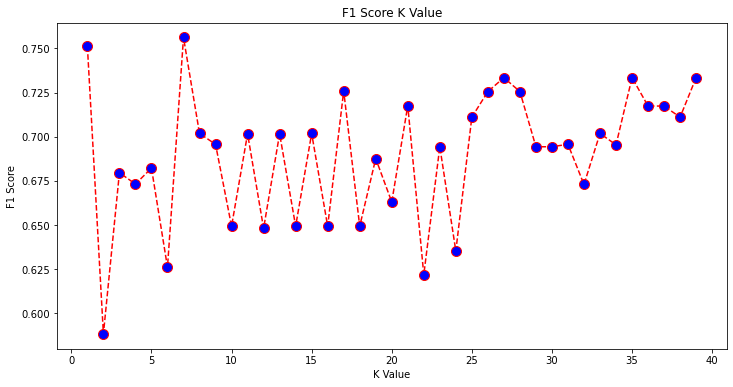

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Por lo que vemos, conviene k=7 para una mejor predicción

In [24]:
classifier_7 = KNeighborsClassifier(n_neighbors=7)
classifier_7.fit(X_train, y_train)
y_pred_KNN_7 = classifier_7.predict(X_test)
accuracy_KNN_7=classifier_7.score(X_test, y_test)
# Aquí evaluamos la clasificación
print(accuracy_KNN_7)


0.7592592592592593


Así se mejoró de 68.5% a 75.92%

En la siguiente tabal vemos la mejora de cada modelo.

In [25]:
data=[('Decision Tree Classifier', accuracy_DecisionTree), ('Decision Tree Classifier (entropía)', accuracy_DecisionTree_Ent), ('KNN Classification',accuracy_KNN) , ('KNN Classification con n=7',accuracy_KNN_7 )]
accuracy2=pd.DataFrame(data, columns=['Modelo', 'Accuracy'])
accuracy2


,Modelo,Accuracy
0,Decision Tree Classifier,0.907407
1,Decision Tree Classifier (entropía),0.907407
2,KNN Classification,0.685185
3,KNN Classification con n=7,0.759259


- [X] <span style=color:red><b>__Exercici 4:__</b></span>
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.


Comparamos los modelos con cross-validation

In [26]:
from sklearn.model_selection import cross_val_score
cvs_clf = cross_val_score(clf, X, y, cv=5)
cvs_clf2 = cross_val_score(clf2, X, y, cv=5)
cvs_KNN = cross_val_score(classifier, X, y, cv=5)
cvs_KNN_7 = cross_val_score(classifier_7, X, y, cv=5)


In [27]:
data=[('Decision Tree Classifier', cvs_clf.mean(), cvs_clf.std() ), ('Decision Tree Classifier (entropía)', cvs_clf2.mean(), cvs_clf2.std()), ('KNN Classification',cvs_KNN.mean(),cvs_KNN.std() ) , ('KNN Classification con n=7',cvs_KNN_7.mean(),cvs_KNN_7.std() )]

cvs_comparacion=pd.DataFrame(data, columns=['Model', 'Cross-validation mean', 'Cross-validation standard deviation'])

cvs_comparacion


,Model,Cross-validation mean,Cross-validation standard deviation
0,Decision Tree Classifier,0.887143,0.052813
1,Decision Tree Classifier (entropía),0.886825,0.048113
2,KNN Classification,0.683651,0.032052
3,KNN Classification con n=7,0.672698,0.042809


- [ ] <span style=color:red><b>__Exercici 5:__</b></span>
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)